### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

## Módulo 1 - Classificação de dados - Aula 11 - Desafio: hora da prática

1 - Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

Para a construção de um modelo de machine learning são necessários dados. Como tarefa inicial, faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y). A variável alvo é a coluna que quer classificar, contendo a informação se o paciente possui ou não a diabetes. As variáveis explicativas são todas as colunas com exceção da diabetes. A separação dos dados pode ser feita com a seleção de colunas com pandas.

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('C:\\Users\\joaoc\\OneDrive\\Documentos\\Aprendizado_ONE\\formacao-tech-foundation\\curso17_classificacao_validacao_de_modelos_metricas_de_avaliacao\\desafio_hora_da_pratica\\diabetes.csv')

In [3]:
dados

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [4]:
x = dados.drop('diabetes', axis=1)
y = dados['diabetes']

2 - Realize a divisão dos dados entre treino e teste.

Uma etapa muito importante em projetos de classificação é a validação dos modelos, para identificar se está havendo a generalização do modelo para dados novos. Realize a divisão dos dados entre treino, validação e teste. Utilize 5% dos dados para teste e com o restante, deixe 25% para validação. No momento da separação, use o parâmetro stratify a partir da variável alvo para manter a proporção dos dados.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x, x_teste, y, y_teste = train_test_split(x, y, stratify = y, test_size = 0.05, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

3 - Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

A etapa de modelagem de dados consiste em utilizar um algoritmo capaz de identificar padrões nos dados e classificar os valores. A partir do modelo é possível extrair uma taxa de acerto para entender o seu desempenho. Crie 2 modelos utilizando os algoritmos DecisionTreeClassifier e RandomForestClassifer e avalie a acurácia de treino e teste, escolhendo o valor 3 para o parâmetro max_depth do algoritmo DecisionTreeClassifier e valor 2 para o max_depth do algoritmo RandomForestClassifier, para os modelos não se especializarem demais no padrão dos dados de treino.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

In [9]:
arvore.fit(x_treino, y_treino)
print(f'Acurácia de treino: {arvore.score(x_treino, y_treino)}')
print(f'Acurácia de teste: {arvore.score(x_val, y_val)}')

Acurácia de treino: 0.7571428571428571
Acurácia de teste: 0.776595744680851


In [10]:
random_forest.fit(x_treino, y_treino)
print(f'Acurácia de treino: {random_forest.score(x_treino, y_treino)}')
print(f'Acurácia de teste: {random_forest.score(x_val, y_val)}')

Acurácia de treino: 0.7321428571428571
Acurácia de teste: 0.6914893617021277


4 - Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

A taxa de acerto geralmente não fornece informações suficientes para entender o comportamento do modelo. A matriz de confusão é uma ferramenta mais completa, capaz de fornecer os acertos e erros do modelo para cada classe. Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho da previsão. Para construir a matriz, use o método predict para gerar as previsões dos valores e comparar com os valores reais da base de dados.

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

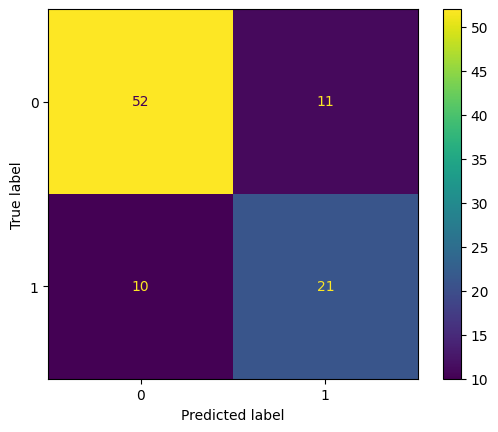

In [12]:
previsao_arvore = arvore.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, previsao_arvore);

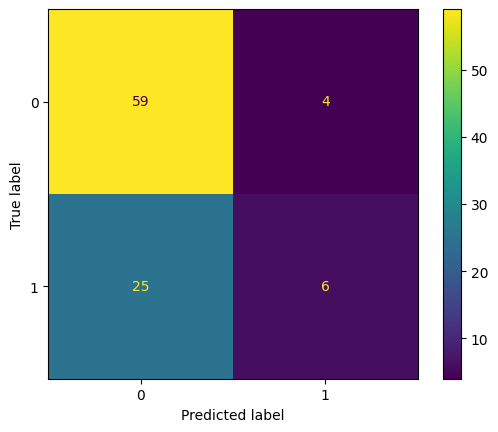

In [13]:
previsao_rf = random_forest.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, previsao_rf);

## Módulo 2 - Métricas de avaliação - Aula 10 - Desafio: hora da prática

1 - Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

Para uma avaliação completa de um modelo de classificação, podemos explorar métricas que avaliam a taxa de acerto geral e também para cada classe da variável alvo de forma individual. Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1. A biblioteca Scikit-Learn possui funções para calcular cada uma das métricas, bastando fazer a importação e utilizar como parâmetros os valores reais e previstos pelo modelo.

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [15]:
previsao_arvore = arvore.predict(x_val)

print(f'Acurácia (Decision Tree): {accuracy_score(y_val, previsao_arvore)}')
print(f'Recall (Decision Tree): {recall_score(y_val, previsao_arvore)}')
print(f'Precisão (Decision Tree): {precision_score(y_val, previsao_arvore)}')
print(f'F1_Score (Decision Tree): {f1_score(y_val, previsao_arvore)}')

Acurácia (Decision Tree): 0.776595744680851
Recall (Decision Tree): 0.6774193548387096
Precisão (Decision Tree): 0.65625
F1_Score (Decision Tree): 0.6666666666666666


In [16]:
previsao_rf = random_forest.predict(x_val)

print(f'Acurácia (Random Forest): {accuracy_score(y_val, previsao_rf)}')
print(f'Recall (Random Forest): {recall_score(y_val, previsao_rf)}')
print(f'Precisão (Random Forest): {precision_score(y_val, previsao_rf)}')
print(f'F1_Score (Random Forest): {f1_score(y_val, previsao_rf)}')

Acurácia (Random Forest): 0.6914893617021277
Recall (Random Forest): 0.1935483870967742
Precisão (Random Forest): 0.6
F1_Score (Random Forest): 0.2926829268292683


2 - Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

Além de métricas numéricas, gráficos podem ser explorados para avaliar o desempenho de um modelo e compreender se ele consegue diferenciar bem uma classe da outra. Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico. A curva ROC pode ser gerada usando o método RocCurveDisplay.from_predictions.

In [17]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

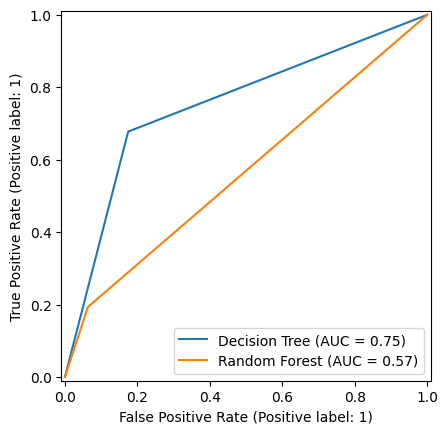

In [18]:
curva_roc = RocCurveDisplay.from_predictions(y_val, previsao_arvore, name = 'Decision Tree')
curva_roc = RocCurveDisplay.from_predictions(y_val, previsao_rf, name = 'Random Forest', ax = curva_roc.ax_)

In [19]:
print(f'AUC (Decision Tree): {roc_auc_score(y_val, previsao_arvore)}')
print(f'AUC (Random Forest): {roc_auc_score(y_val, previsao_rf)}')

AUC (Decision Tree): 0.7514080901177674
AUC (Random Forest): 0.5650281618023554


3 - Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

Além da curva ROC, a curva de precisão x recall pode ser usada para avaliar o desempenho de modelos, sendo mais interessante para dados desbalanceados. Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico. A curva precisão x recall pode ser gerada usando o método PrecisionRecallDisplay.from_predictions.

In [20]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

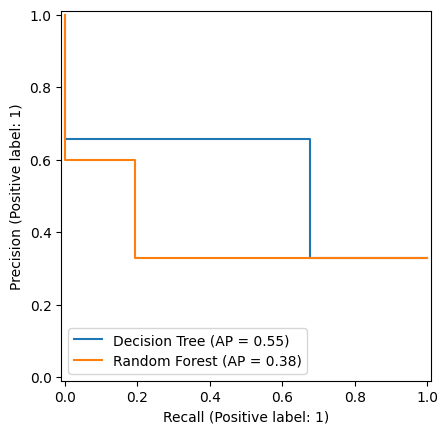

In [21]:
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, previsao_arvore, name = 'Decision Tree')
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, previsao_rf, name = 'Random Forest', ax = curva_precision_recall.ax_) 

In [22]:
print(f'AP (Decision Tree): {average_precision_score(y_val, previsao_arvore)}')
print(f'AP (Random Forest): {average_precision_score(y_val, previsao_rf)}')

AP (Decision Tree): 0.5509394303363074
AP (Random Forest): 0.3820864790665751


4 - Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

Um resumo das principais métricas de classificação pode ser muito útil para sumarizar as informações e gerar insights de forma rápida. Gere os relatórios de métricas dos modelos de classificação construídos no desafio da aula 1. O relatório de métricas pode ser gerado a partir da função classification_report da biblioteca Scikit-Learn.

In [23]:
from sklearn.metrics import classification_report

In [24]:
print('Decision Tree')
print(classification_report(y_val, previsao_arvore))
print('Random Forest')
print(classification_report(y_val, previsao_rf))

Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94

Random Forest
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        63
           1       0.60      0.19      0.29        31

    accuracy                           0.69        94
   macro avg       0.65      0.57      0.55        94
weighted avg       0.67      0.69      0.63        94



## Módulo 3 - Validação Cruzada - Aula 8 - Desafio: hora da prática

1 - Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]

No processo de validação cruzada, são gerados diferentes modelos para cada divisão realizada nos dados e consequentemente diferentes valores de métricas de avaliação. Para encontrar um resultado médio das métricas, pode ser construído um intervalo de confiança a partir da média e desvio padrão das métricas. Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa de 2 parâmetros: um para receber uma lista com os resultados das métricas da validação cruzada e outro para receber o nome do algoritmo. Para gerar o intervalo de confiança, extraia a média dos resultados da lista e o desvio padrão. O intervalo de confiança deve ser apresentado em um print com o valor mínimo sendo a média subtraída de 2 desvios padrão e o valor máximo sendo a média somada de 2 desvios padrão.

In [25]:
def intervalo_conf(resultados, nome_modelo):
    media = resultados.mean()
    desvio_padrao = resultados.std()
    print(f'Intervalo de confiança ({nome_modelo}): [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

2 - Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

KFold é a estratégia mais simples de validação cruzada, que permite a divisão aleatória dos dados em k partes, sendo utilizada uma parte para validação e o restante para treinamento do modelo. O processo de criação de modelos é feito novamente até que todas as partes sejam utilizadas como validação. Sabendo disso, avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método KFold, usando 10 partes, com uso do parâmetro n_splits e embaralhando os dados antes da separação com o parâmetro shuffle. Use o método cross_val_score que não retorna o tempo de execução, apenas as métricas.

In [26]:
from sklearn.model_selection import cross_val_score, KFold

In [27]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = kf)
resultado_rf = cross_val_score(random_forest, x, y, cv = kf)

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confiança (Decision Tree): [0.5337181765177326, 0.8684155361422958]
Intervalo de confiança (Random Forest): [0.6051429170836182, 0.790162915064319]


3 - Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

No processo de divisão de dados com o KFold aleatório, pode ser que a proporção de cada categoria da variável alvo não seja mantida em cada uma das partes dos dados. Para manter essa proporção em cada uma das partes, podemos utilizar o KFold estratificado, deixando o processo de validação de dados bem mais consistente. Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (cross_val_score) com o método StratifiedKFold, com uso do parâmetro n_splits e embaralhando os dados antes da separação com o parâmetro shuffle e avaliando a métrica F1-Score usando o parâmetro scoring.

In [28]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [29]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, x, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest') 

Intervalo de confiança (Decision Tree): [0.271659875902482, 0.7462406274736961]
Intervalo de confiança (Random Forest): [0.11653731287759045, 0.6439632031182816]


4 - Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.

Em conjuntos de dados com poucos registros (poucas linhas), as estratégias de separação dos dados para validação podem fazer com que reste pouca informação nos dados de treinamento, fazendo com que o modelo não compreenda bem o padrão dos dados. O LeaveOneOut é uma estratégia para contornar esse problema, utilizando apenas um registro como dado de validação. Avalie o desempenho dos modelos utilizando a validação cruzada (cross_val_score) com o método LeaveOneOut.

In [30]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [31]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arvore = cross_val_score(arvore, x, y, cv = loo)
resultado_rf = cross_val_score(random_forest, x, y, cv = loo)

print(f'Acurácia média (Decision Tree): {resultado_arvore.mean()}')
print(f'Acurácia média (Random Forest):{resultado_rf.mean()}') 

Acurácia média (Decision Tree): 0.7085561497326203
Acurácia média (Random Forest):0.6951871657754011


## Módulo 4 - Balanceamento de dados - Aula 11 - Desafio: hora da prática

1 - Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

O desbalanceamento dos dados da variável alvo pode fazer com que o modelo fique tendencioso a acertar os padrões de apenas da categoria que tem maior quantidade, tornando necessário em alguns casos um tratamento específico de balanceamento de dados. A etapa inicial é identificar se existe ou não o desbalanceamento de dados na variável alvo. Por conta disso, verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados, usando o método value_counts(normalize=True) ou com a utilização de um gráfico de contagem, usando o gráfico countplot da biblioteca seaborn para entender se há um desbalanceamento de dados.

In [32]:
dados['diabetes'].value_counts(normalize = True)

diabetes
0    0.670051
1    0.329949
Name: proportion, dtype: float64

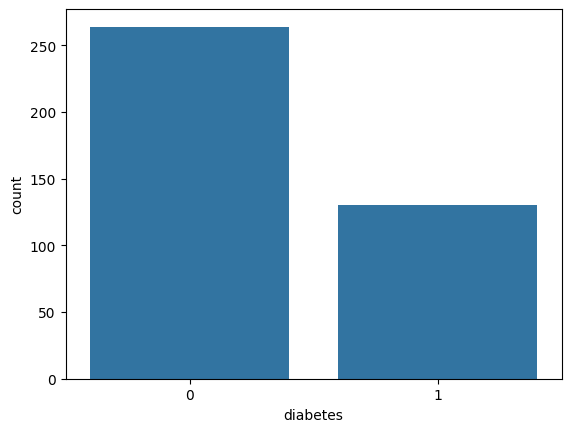

In [33]:
import seaborn as sns 

sns.countplot(dados, x = 'diabetes');

2 - Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

Ao realizar o balanceamento de dados em uma validação cruzada, é necessário utilizar um pipeline, para que os dados de validação não sejam balanceados, se mantendo no padrão dos dados do mundo real. Utilize um pipeline contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com SMOTE, obtendo a média do F1-Score de uma validação cruzada com StratifiedKFold.

In [34]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

In [35]:
arvore = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', arvore)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arvore = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arvore.mean()}')

F1 (Decision Tree):0.5875432797752532


In [36]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('oversample', SMOTE()), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}') 

F1 (Random Forest):0.6132838865697744


3 - Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

Além do oversampling, é possível utilizar a estratégia de undersampling para fazer o balanceamento dos dados. Apesar de serem estratégias distintas, ambas necessitam de um pipeline por se tratar de balanceamento de dados em uma validação cruzada. Utilize um pipeline contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com NearMiss na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com StratifiedKFold.

In [37]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

In [38]:
arvore = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', arvore)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arvore = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arvore.mean()}') 

F1 (Decision Tree):0.5449681473471796


In [39]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6231787042737807


4 - Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

Após realizar diversas análises e aprimorar o desempenho dos modelos, chega a etapa final, que consiste em selecionar o modelo com melhor desempenho e fazer a avaliação final em um conjunto de dados de teste, que não foi visto durante o processo de treinamento e validação. Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e treine um modelo usando todos os dados com a melhor estratégia. Realize a avaliação do modelo usando os dados de teste que foram separados no início dos desafios, obtendo o relatório de métricas e matriz de confusão.

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.50      0.71      0.59         7

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20



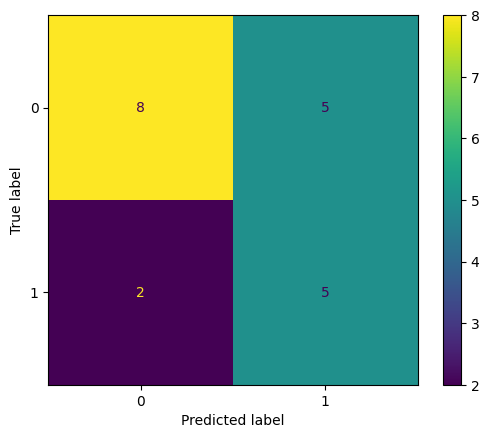

In [40]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);